In [1]:
!pip install tensorflow opencv-python matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Define paths
dataset_path = 'C:\\Users\\archa\\OneDrive\\Documents\\project\\Img Classification\\Images'
categories = ['India', 'USA', 'Japan', 'Brazil', 'Egypt']

# Parameters
img_size = 128  # Resize images to 128x128

def load_data():
    data = []
    labels = []
    
    for category in categories:
        path = os.path.join(dataset_path, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    
    data = np.array(data)
    labels = np.array(labels)
    
    return data, labels

data, labels = load_data()

# Normalize data
data = data / 255.0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\archa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1678 - loss: 1.6396 - val_accuracy: 0.1000 - val_loss: 2.5183
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.4265 - loss: 1.6582 - val_accuracy: 0.5000 - val_loss: 1.5016
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - accuracy: 0.2133 - loss: 1.6313 - val_accuracy: 0.5000 - val_loss: 1.4535
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.4370 - loss: 1.4126 - val_accuracy: 0.1000 - val_loss: 1.5976
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - accuracy: 0.3882 - loss: 1.2958 - val_accuracy: 0.2000 - val_loss: 1.4549
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.5455 - loss: 1.1481 - val_accuracy: 0.7000 - val_loss: 1.3253
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.7484 - loss: 0.9555 - val_accuracy: 0.7000 - val_loss: 1.2434
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.6573 - loss: 0.8282 - val_accuracy: 0.8000 - val_loss: 1.

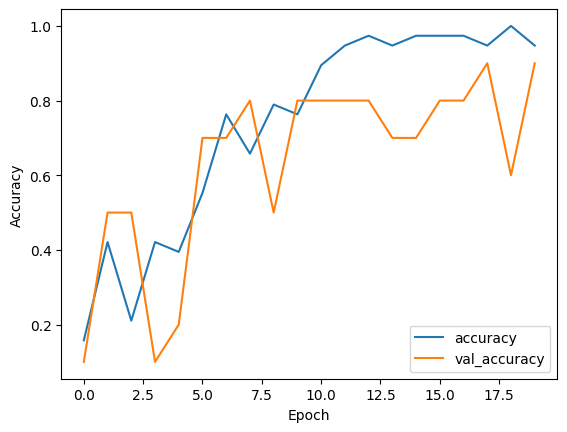

1/1 - 0s - 98ms/step - accuracy: 0.9000 - loss: 0.9070
Test accuracy: 0.8999999761581421


In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


In [9]:
def prepare_image(image_path):
    img_array = cv2.imread(image_path)
    if img_array is None:
        raise FileNotFoundError(f"No image found at the path: {image_path}")
    resized_img = cv2.resize(img_array, (img_size, img_size))
    normalized_img = resized_img / 255.0
    return normalized_img.reshape(-1, img_size, img_size, 3)

image_path = 'C:\\Users\\archa\\OneDrive\\Documents\\project\\Img Classification\\testImg\\Japan.png'
prepared_image = prepare_image(image_path)

prediction = model.predict(prepared_image)
predicted_class = categories[np.argmax(prediction)]

print(f'The predicted flag is: {predicted_class}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
The predicted flag is: Japan


In [10]:
predicted_class

'Japan'

In [14]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


NameError: name 'best_clf' is not defined

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Assuming best_clf is your trained classifier
best_clf = clf

# Save the model
joblib.dump(best_clf, 'saved_model.pkl')


['saved_model.pkl']

In [18]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(predicted_class))